<a href="https://colab.research.google.com/github/IrigoyenCodes/ArtificialIntelligence/blob/main/irisProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS

In [57]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
from sklearn.tree import DecisionTreeClassifier


# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [12]:
iris_df = pd.read_csv("/content/Iris.csv")
iris_train = pd.read_csv("/content/Iris.csv")
iris_test = pd.read_csv("/content/Iris.csv")

In [17]:
print("\nDataset Information:")
print(f"Number of samples: {iris_df.shape[0]}")
print(f"Number of features: {iris_df.shape[1] - 1}")  # Subtracting 1 for the target column
print("\nSample data:")
print(iris_df.head())


Dataset Information:
Number of samples: 150
Number of features: 5

Sample data:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
X = iris_df.drop('Species', axis=1).values
y = iris_df['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Testing set size: 30 samples


In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


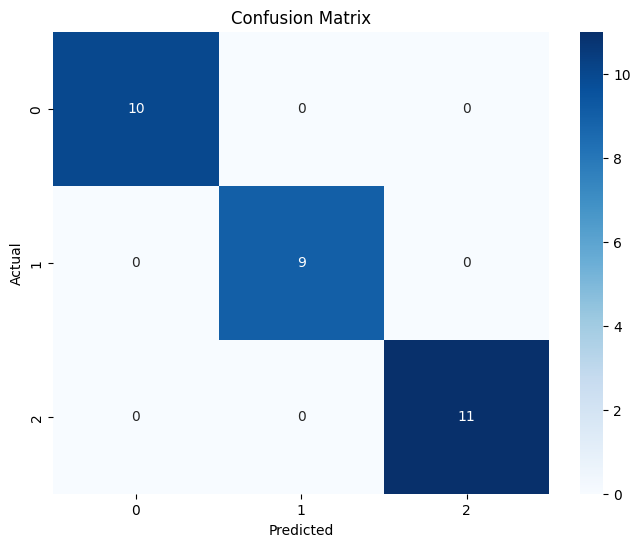

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# HOW TO PREVENT OVERFITTING?

By using the max_depth = 3, you're already preventing overfitting on the code, but you could also use cross-validation techniques, as well as ensuring data is not too small or imbalanced

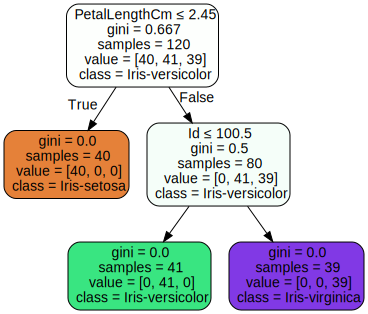

In [55]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_classifier,
                           out_file=None,
                           feature_names=iris_df.columns[:-1],
                           class_names=dt_classifier.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # Saves as iris_tree.pdf
graph.view()
graph

In [56]:
print(f'thanks!')

thanks!
